In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "https://raw.githubusercontent.com/shobhit-nigam/knowledgeclan/main/datasets/auto-mpg.data"

In [3]:
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]


In [4]:
cars = pd.read_table(path, delim_whitespace=True, names=columns)

In [5]:
cars


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [8]:
filtered_cars = cars[cars['horsepower']!='?'].copy()

In [9]:
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

In [11]:
filtered_cars


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
def train_and_test(cols):
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    
    #fit the model
    model = LinearRegression()
    model.fit(features, target)
    
    #make predictions, training set
    predictions = model.predict(features)
    
    #compute mse & variance
    mse = mean_squared_error(filtered_cars["mpg"], predictions)
    variance = np.var(predictions)
    
    
    return (mse, variance)

In [15]:
cyl_mse, cyl_var = train_and_test(["cylinders"])
weight_mse, weight_var = train_and_test(["weight"])

In [16]:
cyl_mse, cyl_var

(24.02017956815553, 36.742558874160174)

In [17]:
weight_mse, weight_var

(18.6766165974193, 42.08612184489639)

In [19]:
one_mse, one_var = train_and_test(["cylinders"])

two_mse, two_var = train_and_test(["cylinders", "displacement"])

three_mse, three_var = train_and_test(["cylinders", "displacement", "horsepower"])

four_mse, four_var = train_and_test(["cylinders", "displacement", "horsepower", "weight"])

five_mse, five_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration"])

six_mse, six_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])

seven_mse, seven_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration", "origin"])



In [20]:
seven_mse, seven_var

(16.975669479931113, 43.78706896238445)

In [21]:
six_mse, six_var

(11.590170981415227, 49.17256746090044)

In [22]:
five_mse, five_var

(17.76139610540622, 43.00134233690935)

In [23]:
four_mse, four_var

(17.763860571843846, 42.998877870471844)

In [24]:
three_mse, three_var

(20.25295483971423, 40.50978360260144)

In [25]:
two_mse, two_var

(21.282057055586364, 39.48068138672939)

In [26]:
one_mse, one_var

(24.02017956815553, 36.742558874160174)

In [39]:
# over fitting
from sklearn.model_selection import KFold
def train_and_crossval(cols):
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    
    variance_values = []
    mse_values = []
    
    kf = KFold(n_splits=10, shuffle=True, random_state = 3)
    
    for train_index, test_index, in kf.split(features):
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        
    
        #fit the model
        model = LinearRegression()
        model.fit(X_train, y_train)
    
        #make predictions, training set
        predictions = model.predict(X_test)
    
        #compute mse & variance
        mse = mean_squared_error(y_test, predictions)
        variance = np.var(predictions)
    
        variance_values.append(variance)
        mse_values.append(mse)
    
    avg_mse = np.mean(mse_values)
    avg_var = np.mean(variance_values)
    
    
    return (avg_mse, avg_var)

In [40]:
one_mse, one_var = train_and_crossval(["cylinders"])

two_mse, two_var = train_and_crossval(["cylinders", "displacement"])

three_mse, three_var = train_and_crossval(["cylinders", "displacement", "horsepower"])

four_mse, four_var = train_and_crossval(["cylinders", "displacement", "horsepower", "weight"])

five_mse, five_var = train_and_crossval(["cylinders", "displacement", "horsepower", "weight", "acceleration"])

six_mse, six_var = train_and_crossval(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])

seven_mse, seven_var = train_and_crossval(["cylinders", "displacement", "horsepower", "weight", "acceleration", "origin"])

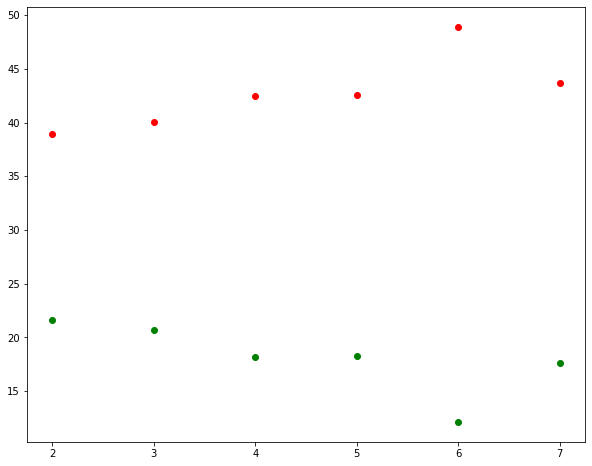

In [43]:
plt.figure(figsize=(10,8))

plt.scatter([2,3,4,5,6,7], [two_mse, three_mse, four_mse, five_mse, six_mse, seven_mse], color='green')
plt.scatter([2,3,4,5,6,7],[ two_var, three_var, four_var, five_var, six_var, seven_var], color = 'red')

plt.show()